<a href="https://colab.research.google.com/github/evansemet/Cracking-The-Cryptic-Solutions/blob/main/What_Is_A_'Neighbour_Sum'_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
def printBoard(board):
  x = np.ones((3,3))
  groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
  fig, ax = plt.subplots(1, 1, figsize=(3, 3))
  x = np.array(board.astype('int').astype('str'))
  x[x == "0"] = "-"
  ax = sns.heatmap(groups, annot=x, cbar=False, cmap="tab20", fmt="", vmin=0, vmax=19, linewidths=1, annot_kws={"size":10})
  ax.axis("off")    
  plt.tight_layout()
  plt.show()

Solving...
Solved in 0.1691141128540039 seconds.


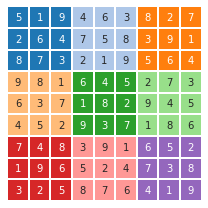

In [8]:
print("Solving...")
start = time.time()
board = np.zeros((9, 9))
X = np.array(IntVector('x', 9**2), dtype=object).reshape(9, 9)
s = Tactic("qffd").solver()

# normal sudoku
s += [And(i > 0, i < 10) for i in X.ravel()]
s += [Distinct(list(X[i, :])) for i in range(9)]
s += [Distinct(list(X[:, i])) for i in range(9)]
x = np.ones((3,3))
groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
s += [Distinct(list(X[groups == i].ravel())) for i in range(9)]

# add in rules
def neigh(r,c):
  neighbours = [(0,1), (0,-1), (1,0), (-1,0)]
  valid_neighbours = []
  for a,b in neighbours:
    if r+a<9 and r+a>=0 and c+b<9 and c+b>=0:
      valid_neighbours.append((r+a, c+b))
  sum = 0
  for a,b in valid_neighbours:
    sum += X[a,b]
  return X[r,c] == sum

s += And(neigh(0,2), neigh(0,6), neigh(4,2), neigh(4,6), neigh(5,3), neigh(5,5), neigh(6,4), neigh(8,0), neigh(8,8))

# arrows
s += And(X[0,0] + X[0,1] == X[1,1], X[2,4] + X[3,4] == X[1,4], X[0,7] + X[0,8] == X[1,7], X[5,1] + X[6,1] == X[7,1], X[6,7] + X[7,7] == X[5,7])
# given
s += And(X[4,4] == 8, X[5,8] == 6)
# differ by one
s += And(Or(X[2,7] - X[3,7] == 1, X[2,7] - X[3,7] == -1), Or(X[5,1] - X[6,1] == 1, X[5,1] - X[6,1] == -1), Or(X[8,4] - X[8,5] == 1, X[8,4] - X[8,5] == -1))

if s.check() == sat:
  m = s.model()
  eval = np.vectorize(lambda x : m.evaluate(x))
  boardTemp = eval(X)
  print(f"Solved in {time.time() - start} seconds.")
  for (r, c), e in np.ndenumerate(boardTemp):
    board[r][c] = str(e)
  printBoard(board)
else:
  print(f"Failed in {time.time() - start} seconds.")